# Introduction to Gillespie Algorithm

- The Gillespie algorithm is a stochastic simulation mehtods that is useful for systems where the number of entites is small enough that random fluctuations have a significant impact on system dynamics.
- In stochastic processes, the next state of the system is not determined entirely by the current state, but involves some randomness. This is in contrast with deterministic processes.

## Propensity
Propensity is a measure of the likelihood of an event occuring in a small time interval.

## Algorithm steps:
1. Initialization
2. Propensity calculation
3. Time to next event
4. Event selection
5. State update
6. Iteration


## Applied to Population Dynamics

### Propensity calculation:
- Birth propensity: given a birth rate $\lambda$, the propensity for a birth event when there are $N$ individuals is $\lambda \cdot N$
- Death propensity: given a death rate $\mu$, the propensity for a death event is $\mu \cdot N$

### Time to next event
The time to next event (either birth or death) is determined by the total propensity of all events, $a_0 = \lambda \cdot N + \mu \cdot N$. The time $\Delta t$ to the next event is sample from an exponential distribution with parameter $a_0$:

$P(\Delta t) = a_0 \exp(-a_0 \Delta t) $

### Event selection
With the probabilities of birth and death $P(birth) = \frac{\lambda \cdot N}{a_0}$ and $P(death) = \frac{\mu \cdot N}{a_0}$. The Gillespie algorithm selects which event occurs next based on these probabilities

### Algorithm steps

1. **Initialization**: Define the initial population size $N$ and set the initial time.
2. **Calculate Propensities**: Compute the birth and death propensities based on the current population size.
3. **Determine $\Delta t$**: Sample the time to the next event from an exponential distribution with mean $1/a_0$.
4. **Select Event**: Choose a birth or death event to occur next, based on their relative probabilities.
5. **Update Population**: Increment or decrement the population size according to the selected event.
6. **Advance Time**: Update the system time by $\Delta t$ and repeat from step 2 until reaching a specified end condition.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Gillespie simulation specific to population growth

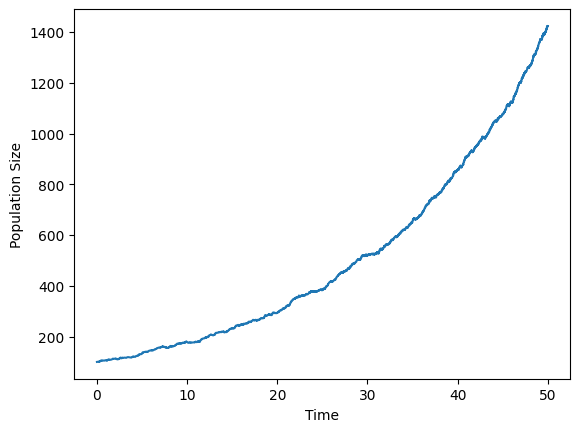

In [8]:
# propensity parameters
birth_rate = 0.1
death_rate = 0.05

# simulation parameters
initial_population = 100
max_time = 50

# initialize simulation
population = initial_population
time = 0
times = [time]             # place holder for saved times
populations = [population] # place holder for saved populations

# Gillespie simulation
while time < max_time:
    if population == 0:
        break  # extinction

    # calculate propensities
    birth_propensity = birth_rate * population
    death_propensity = death_rate * population
    total_propensity = birth_propensity + death_propensity

    # determine time to next event
    # sample from an exponential distribution
    time_to_next = np.random.exponential(1/total_propensity)  # todo -- check if this is right
    time += time_to_next

    # select event
    # pick random number in range (0,1)
    random_value = np.random.random() * total_propensity
    if random_value < birth_propensity:
        population += 1  # one birth
    else:
        population -= 1  # one death

    # record the results
    times.append(time)
    populations.append(population)

# plot the results
plt.plot(times, populations)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.show()

# 2-species: predator-prey stochastic model

In [41]:
# initial state
initial_prey_population = 100
initial_predator_population = 10

# propensities
prey_birth_rate = 0.05 # natural birth rate
predation_rate = 0.001  # rate at which predators consume prey
predator_birth_rate = 0.001  # rate at which predator reproduce (proportional to consumed prey)
predator_death_rate = 0.1

# initialize simulation
prey_population = initial_prey_population
predator_population = initial_predator_population
time = 0
max_time = 1000

# history
time_history = [time]
prey_population_history = [prey_population]
predator_population_history = [predator_population]

# Gillespie simulation
while time < max_time:
    if prey_population == 0 or predator_population == 0:
        break

    # calculate propensities
    prey_birth_propensity = prey_birth_rate * prey_population
    predation_propensity = predation_rate * prey_population * predator_population
    predator_birth_propensity = predator_birth_rate * predator_population * prey_population
    predator_death_propensity = predator_death_rate * predator_population
    total_propensity = prey_birth_propensity + predation_propensity + predator_birth_propensity + predator_death_propensity

    # determine time to next event
    time_to_next = np.random.exponential(1/total_propensity)
    time += time_to_next

    # determine next event
    # random number between (0, total_propensity)
    random_value = np.random.random() * total_propensity
    if random_value < prey_birth_propensity:
        prey_population += 1
    elif random_value < prey_birth_propensity + predation_propensity:
        prey_population -= 1
        predator_population += 1
    elif random_value < prey_birth_propensity + predation_propensity + predator_birth_propensity:
        predator_population += 1
    else:
        predator_population -= 1

    # save the results
    time_history.append(time)
    prey_population_history.append(prey_population)
    predator_population_history.append(predator_population)
        
    
    


In [42]:
time_history[-1]

209.25002490501623

In [46]:
# # len(time_history)
# plt.plot(time_history)
# plt.xlabel('event #')
# plt.ylabel('time')


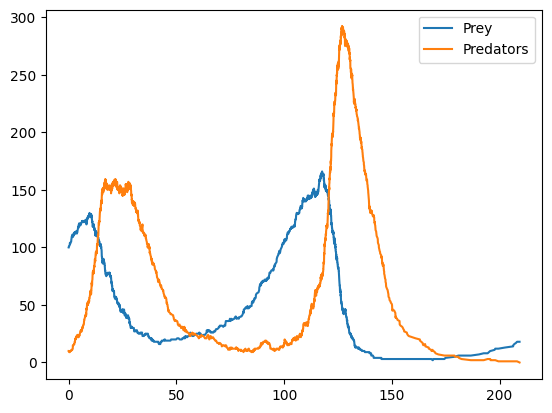

In [47]:
# plot the results
plt.figure()
plt.plot(time_history, prey_population_history, label='Prey')
plt.plot(time_history, predator_population_history, label='Predators')
plt.legend()


## run multiple

In [ ]:
def run_multiple_simulations(
    repeats,
    max_time = 1000,
    
    # initial state
    initial_prey_population = 100,
    initial_predator_population = 10,
    
    # propensities
    prey_birth_rate = 0.05, # natural birth rate
    predation_rate = 0.001,  # rate at which predators consume prey
    predator_birth_rate = 0.001,  # rate at which predator reproduce (proportional to consumed prey)
    predator_death_rate = 0.1,
):
    
    # save all simulations
    all_time_histories = []
    all_prey_histories = []
    all_predator_histories = []

    for _ in range(repeats):

        # initialize simulation
        prey_population = initial_prey_population
        predator_population = initial_predator_population
        time = 0
        
        # history
        time_history = [time]
        prey_population_history = [prey_population]
        predator_population_history = [predator_population]
        
        # Gillespie simulation
        while time < max_time:
            if prey_population == 0 or predator_population == 0:
                break
        
            # calculate propensities
            prey_birth_propensity = prey_birth_rate * prey_population
            predation_propensity = predation_rate * prey_population * predator_population
            predator_birth_propensity = predator_birth_rate * predator_population * prey_population
            predator_death_propensity = predator_death_rate * predator_population
            total_propensity = prey_birth_propensity + predation_propensity + predator_birth_propensity + predator_death_propensity
        
            # determine time to next event
            time_to_next = np.random.exponential(1/total_propensity)
            time += time_to_next
        
            # determine next event
            # random number between (0, total_propensity)
            random_value = np.random.random() * total_propensity
            if random_value < prey_birth_propensity:
                prey_population += 1
            elif random_value < prey_birth_propensity + predation_propensity:
                prey_population -= 1
                predator_population += 1
            elif random_value < prey_birth_propensity + predation_propensity + predator_birth_propensity:
                predator_population += 1
            else:
                predator_population -= 1
        
            # save the results
            time_history.append(time)
            prey_population_history.append(prey_population)
            predator_population_history.append(predator_population)

        all_time_histories.append(time_history)
        all_prey_histories.append(prey_population_history)
        all_predator_histories.append(predator_population_history)



        